In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("BankNote_Authentication.csv")

In [3]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


# data exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [5]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [6]:
df["variance"].describe()

count    1372.000000
mean        0.433735
std         2.842763
min        -7.042100
25%        -1.773000
50%         0.496180
75%         2.821475
max         6.824800
Name: variance, dtype: float64

In [7]:
df["skewness"].describe()

count    1372.000000
mean        1.922353
std         5.869047
min       -13.773100
25%        -1.708200
50%         2.319650
75%         6.814625
max        12.951600
Name: skewness, dtype: float64

In [8]:
df["curtosis"].describe()

count    1372.000000
mean        1.397627
std         4.310030
min        -5.286100
25%        -1.574975
50%         0.616630
75%         3.179250
max        17.927400
Name: curtosis, dtype: float64

In [9]:
df["entropy"].describe()

count    1372.000000
mean       -1.191657
std         2.101013
min        -8.548200
25%        -2.413450
50%        -0.586650
75%         0.394810
max         2.449500
Name: entropy, dtype: float64

In [10]:
df["class"].value_counts()

0    762
1    610
Name: class, dtype: int64

In [11]:
df["class"].describe()

count    1372.000000
mean        0.444606
std         0.497103
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: class, dtype: float64

In [12]:
pd.crosstab(df['class'], df['variance']).T.head()

class,0,1
variance,,
-7.0421,0,1
-7.0364,0,1
-6.9599,0,1
-6.7526,0,1
-6.7387,0,1


In [13]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

# data visualization

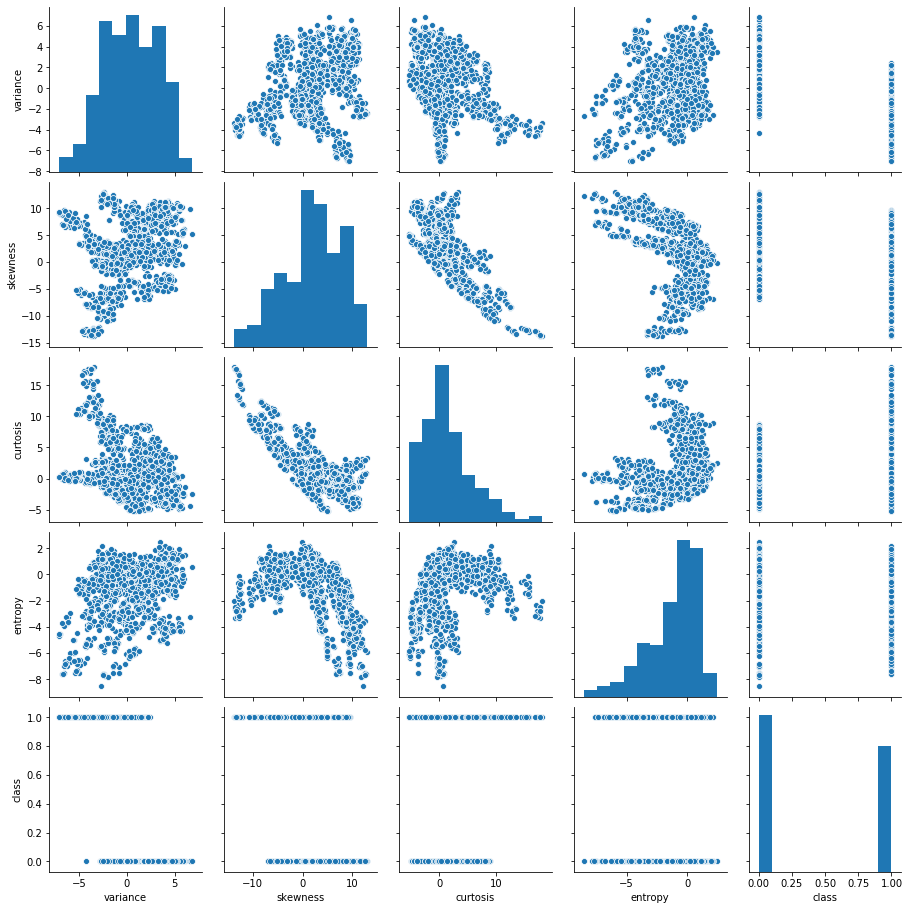

In [14]:
sns.pairplot(df)

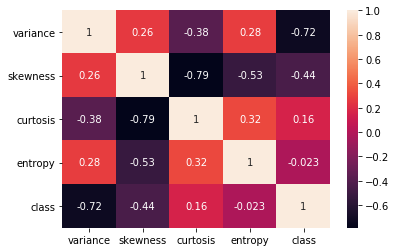

In [15]:
sns.heatmap(df.corr(),annot=True)

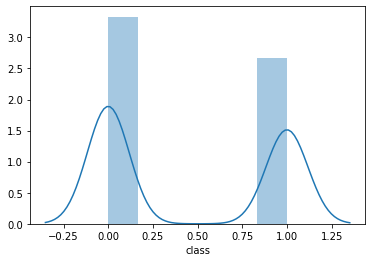

In [16]:
sns.distplot(df["class"])

Text(0, 0.5, 'count')

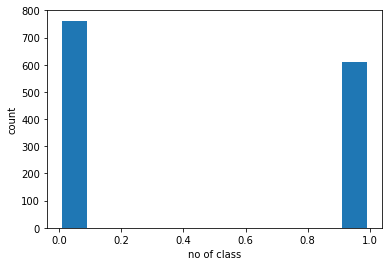

In [17]:
plt.hist(df["class"],rwidth=0.8)
plt.xlabel("no of class")
plt.ylabel("count")

Text(0.5, 1.0, 'class frequency')

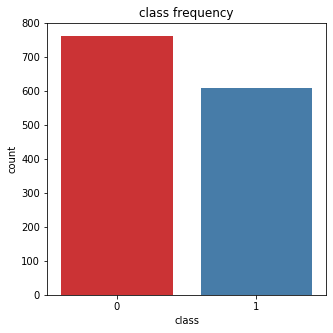

In [18]:
fig =plt.figure(figsize=(5,5))
sns.countplot(df["class"],palette='Set1')
plt.title('class frequency')

Text(0, 0.5, 'count')

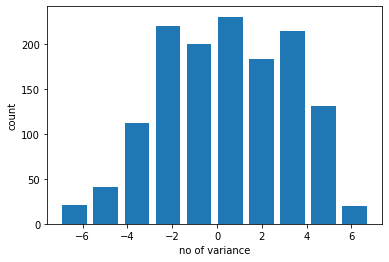

In [19]:
plt.hist(df["variance"],rwidth=0.8)
plt.xlabel("no of variance")
plt.ylabel("count")

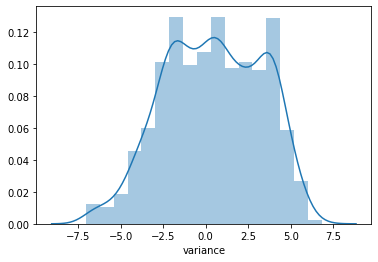

In [20]:
sns.distplot(df["variance"])

Text(0, 0.5, 'count')

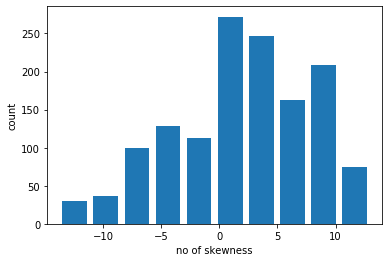

In [21]:
plt.hist(df["skewness"],rwidth=0.8)
plt.xlabel("no of skewness")
plt.ylabel("count")

Text(0, 0.5, 'count')

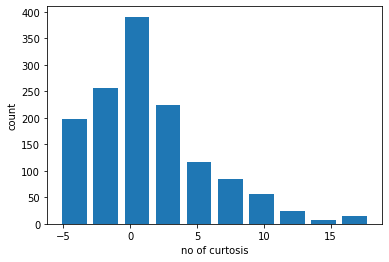

In [22]:
plt.hist(df["curtosis"],rwidth=0.8)
plt.xlabel("no of curtosis")
plt.ylabel("count")

Text(0, 0.5, 'count')

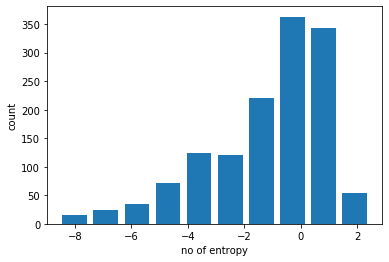

In [23]:
plt.hist(df["entropy"],rwidth=0.8)
plt.xlabel("no of entropy")
plt.ylabel("count")

# MODEL BUILDING

In [24]:
#spilt data into feature and target(output)
x=df.drop("class",axis="columns")
y=df["class"]

In [25]:
x.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [26]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

# splitting the data into train and test data

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test,y_train, y_test= train_test_split (x,y,test_size=0.3,random_state=0)

# Algorithm/ Model 1 : RandomForestClassifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
r_cl= RandomForestClassifier()
r_cl.fit(x_train, y_train)

RandomForestClassifier()

In [30]:
r_cl.score(x_test,y_test)

0.9902912621359223

In [35]:
rc_pred = r_cl.predict(x_test)

In [36]:
rc_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [37]:
from sklearn.metrics import accuracy_score

In [39]:
score=accuracy_score(y_test,rc_pred)

In [40]:
score

0.9902912621359223

# EVALUATING MODEL PERFORMANCE

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [42]:
def display_confusion_matrix(test,pred,model_name =''):
    confmatrix= confusion_matrix(test, pred)
    ax = plt.subplot()
    sns.heatmap(confmatrix, annot=True, ax=ax, cbar=False)
    plt.title('Confusion Matrix for '+str(model_name) + '\n')
    ax.set_xlabel('Ground Truth')
    ax.set_ylabel('Predicted')
    ax.xaxis.set_ticklabels(['0','1'])
    ax.yaxis.set_ticklabels(['0','1'])
    plt.show()

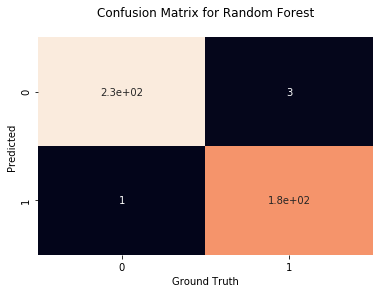

In [43]:
display_confusion_matrix(y_test,rc_pred, 'Random Forest')

In [44]:
print("Accuracy: ", accuracy_score(y_test, rc_pred))
print("Precision: ", precision_score(y_test, rc_pred))
print("Recall: ", recall_score(y_test, rc_pred))

Accuracy:  0.9902912621359223
Precision:  0.9835164835164835
Recall:  0.9944444444444445


In [45]:
print(classification_report(y_test, rc_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       232
           1       0.98      0.99      0.99       180

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



# Algorithm/ Model 2 : Naive Bayes

In [46]:
from sklearn.naive_bayes import GaussianNB 
nb= GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [47]:
nb_pred= nb.predict(x_test)

In [48]:
nb_pred

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,

Accuracy:  0.8325242718446602
Precision:  0.8135593220338984
Recall:  0.8
F1 Score:  0.8067226890756303


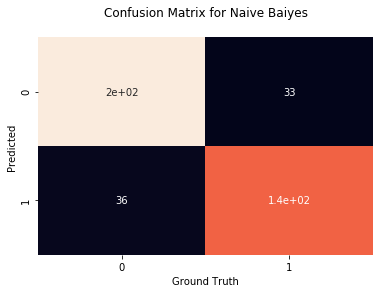

In [49]:
print("Accuracy: ", accuracy_score(y_test, nb_pred))
print("Precision: ", precision_score(y_test, nb_pred))
print("Recall: ", recall_score(y_test, nb_pred))
print("F1 Score: ", f1_score(y_test, nb_pred))
display_confusion_matrix(y_test,nb_pred, 'Naive Baiyes')

# Algorithm/ Model 3: Support Vector Machine

In [50]:
from sklearn.svm import SVC
svc_classifier = SVC()
svc_classifier.fit(x_train, y_train)

SVC()

In [51]:
svc_pred = svc_classifier.predict(x_test)

Accuracy:  0.9975728155339806
Precision:  0.994475138121547
Recall:  1.0
F1 Score:  0.9972299168975068


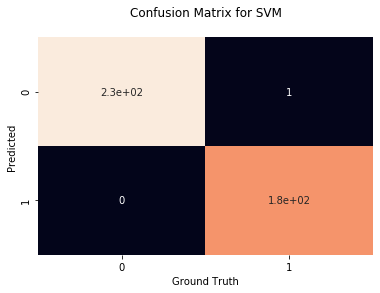

In [52]:
print("Accuracy: ", accuracy_score(y_test, svc_pred))
print("Precision: ", precision_score(y_test, svc_pred))
print("Recall: ", recall_score(y_test, svc_pred))
print("F1 Score: ", f1_score(y_test, svc_pred))
display_confusion_matrix(y_test,svc_pred, 'SVM')

# Algorithm/ Model 3: Xgboost

In [53]:
import xgboost as xgb
xgbmodel=xgb.XGBClassifier(base_score=0.50, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=5, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
xgbmodel.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [54]:
xgb_pred=xgbmodel.predict(x_test)

Accuracy:  0.9975728155339806
Precision:  1.0
Recall:  0.9944444444444445
F1 Score:  0.9972144846796658


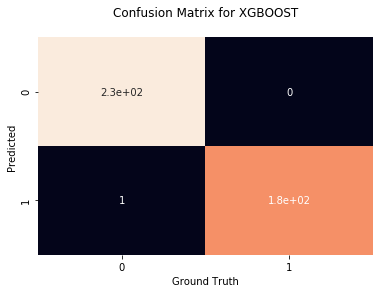

In [55]:
print("Accuracy: ", accuracy_score(y_test, xgb_pred))
print("Precision: ", precision_score(y_test, xgb_pred))
print("Recall: ", recall_score(y_test, xgb_pred))
print("F1 Score: ", f1_score(y_test, xgb_pred))
display_confusion_matrix(y_test,xgb_pred, 'XGBOOST')

# model deployment

In [122]:
import pickle
pickle_out=open("classifier.pkl","wb")
pickle.dump(classifier,pickle_out)
pickle_out.close()